In [1]:
import pandas as pd

In [2]:
cols = ['PersonId', 'Name', 'LastName', 'CurrentRole', 'Country', 
        'Industry', 'NumberOfRecommendations','NumberOfConnections']
profiles = pd.read_csv('R&D Challenge - file 2 (people).in', sep='|', header=None, names=cols)
profiles.head()

,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections
0,573435640,jean,harion,vice president,Dominica,Telecommunications,0,0
1,337983069,meredith,kopit-levien,chief revenue officer,United States,Publishing,0,0
2,556570894,daniel,roe,"vp, customer operations and support",United States,Computer Software,0,270
3,646158956,craig,gulliver,"vice president, support services",Canada,Computer Software,0,0
4,345736039,isaac,stringer,vice president,United States,Electronics,0,0


In [3]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2779 entries, 0 to 2778
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   PersonId                 2779 non-null   int64 
 1   Name                     2778 non-null   object
 2   LastName                 2776 non-null   object
 3   CurrentRole              2155 non-null   object
 4   Country                  2777 non-null   object
 5   Industry                 2779 non-null   object
 6   NumberOfRecommendations  2779 non-null   int64 
 7   NumberOfConnections      2779 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 173.8+ KB


### Some points to ponder

- We have data with few null values. As part of this exercise let's focus on the simplest approach to identify strong profiles
- One approach is to build a recommender system which gives back top 10 ids of potential clients
- We assume that profiles with top managements positions like `director`, `president`, `ceo`, have strong decision power and so are good clients to target
- We assume that profiles with larger connections are healthier and genuine profiles
- We assume that profiles with higher recommendations are healthier and stronger profiles

In [4]:
def recommend(profiles, CurrentRole=None, Country=None, Industry=None):
    """Returns the ids of top profiles which have the good conversion rate"""
    
    # filter profiles if needed only to a particular
    # country, role or industry. This can help us narrow down our target list
    
    if CurrentRole:
        profiles = profiles[profiles['CurrentRole'] == CurrentRole]
    if Country:
        profiles = profiles[profiles['Country'] == Country]
    if Industry:
        profiles = profiles[profiles['Industry'] == Industry]
    
    # to identify top management profiles with high decision power
    profiles = profiles[profiles["CurrentRole"].str.contains("board|director|vice|president|chairman|owner|partner|officer|chief|senior", na=False)]
    
    # sort by stronger profiles
    profiles = profiles.sort_values(['NumberOfConnections', 'NumberOfRecommendations'], ascending=False)
    
    ids = profiles['PersonId'][:10].values.tolist()
    ids = [str(personid) for personid in ids]
    
    # write the ids to a people.out file
    with open('people.out', mode='wt', encoding='utf-8') as myfile:
        myfile.write('\n'.join(ids))
        
    return profiles

In [5]:
r = recommend(profiles=profiles)
r.head(10)

,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections
834,638158937,richard,gough,group deputy legal and development director,United Kingdom,Legal Services,0,500
14,85424165,antoine,khanji,president,Canada,Information Technology and Services,5,406
470,640052334,harry,busby,client services manager,United Kingdom,Financial Services,0,167
39,196993159,john,sawyer,chief executive officer,Canada,Publishing,0,113
270,638127607,derek,kerr,senior operator - cactus lake,Canada,Oil & Energy,0,44
378,645761356,elena,komkova,senior development scientist,Canada,Biotechnology,0,34
0,573435640,jean,harion,vice president,Dominica,Telecommunications,0,0
1,337983069,meredith,kopit-levien,chief revenue officer,United States,Publishing,0,0
3,646158956,craig,gulliver,"vice president, support services",Canada,Computer Software,0,0
4,345736039,isaac,stringer,vice president,United States,Electronics,0,0


- We see some bogus profiles here with zero recommendations and connections but of course our dataset is too small with only 2700 rows.
- For larger datasets this can improve
- Running the function directly writes the `people.out` with top 10 ids

Let's try to identify profiles to a particular `country`

In [6]:
recommend(profiles=profiles, Country='United States').head(10)

,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections
1,337983069,meredith,kopit-levien,chief revenue officer,United States,Publishing,0,0
4,345736039,isaac,stringer,vice president,United States,Electronics,0,0
7,643456781,louisa long,jaffe,president and chief executive officer,United States,Internet,0,0
8,645564136,john,mollard,vice president and treasurer,United States,Electronics,0,0
10,344601083,mark,jankins,vice president - studio media strategy and ope...,United States,Telecommunications,0,0
11,559935336,melissa,kvitko,vice president,United States,Investment Banking,0,0
15,643901149,lindsey,garland,vice president of accounting,United States,Renewables & Environment,0,0
22,501977703,bhupinder,lehga,president and chief executive officer,United States,Electronics,0,0
23,556435264,jeanne,schoeffler,"vice president, real estate, accounting",United States,Business Services,0,0
24,526394935,geoffrey,mccarty,vice president of marketing,United States,Management Consulting,0,0


Let's try to get profiles only by `CurrentRole`

In [7]:
recommend(profiles=profiles, CurrentRole='board member').head(10)

,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections
21,573681412,mr.,shams,board member,Bangladesh,Information Technology and Services,0,0
187,645309020,rhonda,santry,board member,United States,Investment Banking,0,0
420,646165836,vern,bennett,board member,United States,Cultural,0,0
457,646032545,liam,dawson,board member,United Kingdom,Manufacturing,0,0
547,643034792,heinz,smirmaul,board member,Canada,Consumer Services,0,0
671,637937355,cesar j.,guajardo,board member,Canada,Manufacturing,0,0
698,640802420,alain,guy,board member,Canada,Education Management,0,0
752,637829538,leslie dewart,giroday,board member,Canada,Hospitality,0,0
775,643586055,ryan,fraser,board member,Canada,Hospitality,0,0
898,644018545,andrew,karwowski,board member,Canada,Cultural,0,0


### What are the limitations of this approach?
- There is no model training and this on the fly approach
- We are unable to classify or judge or predict any new profile
- We might want to filter out profiles that we have already contacted
- On very large datasets with millions of rows this might be very slow

### What data can improve the approach?
 
- Feature like has the client worked with us earlier?
- Feature like does the client develop software with another company? Maybe a competition?
- Feature like has the client ever interacted with us?
- Feature like when was the last timestamp when the client ever interacted with us?
- Feature like our conversion rate based on country 

1. We can develop a score for each client and this could be our target variable `y`
2. These features can help us build a classifier which can predict the probability of conversion for each new profile
3. Finally we can sort out the profiles which have the highest probability of conversion
4. We can use ensemble models like `Random Forest` or more popular boosting models like `XGboost` to train on our dataset
5. For evaluation we can use cross validation with randomized search for hyper parameter tuning.

In [8]:
profiles.head()

,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections
0,573435640,jean,harion,vice president,Dominica,Telecommunications,0,0
1,337983069,meredith,kopit-levien,chief revenue officer,United States,Publishing,0,0
2,556570894,daniel,roe,"vp, customer operations and support",United States,Computer Software,0,270
3,646158956,craig,gulliver,"vice president, support services",Canada,Computer Software,0,0
4,345736039,isaac,stringer,vice president,United States,Electronics,0,0


In [9]:
from sklearn.preprocessing import LabelEncoder

object_cols = ['CurrentRole', 'Country', 'Industry']
X = profiles.copy()

X.dropna(inplace=True)
print(X.shape)

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    
    X[col] = label_encoder.fit_transform(X[col])

X.head()

(2152, 8)


,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections
0,573435640,jean,harion,1548,13,101,0,0
1,337983069,meredith,kopit-levien,256,48,91,0,0
2,556570894,daniel,roe,1596,48,21,0,270
3,646158956,craig,gulliver,1588,5,21,0,0
4,345736039,isaac,stringer,1548,48,32,0,0


In [10]:
from sklearn.cluster import KMeans
X_train = X[['CurrentRole', 'Country', 'Industry', 'NumberOfRecommendations', 'NumberOfConnections']]
kclusterer = KMeans(n_clusters=5)
kclusterer.fit(X_train)
len(set(kclusterer.labels_))

5

In [11]:
kclusterer.labels_

array([0, 3, 0, ..., 3, 1, 3], dtype=int32)

So we have used unsupervised learning to divide our dataset into 5 clusters! That's nice


In [12]:
from sklearn.decomposition import PCA
reduced_dimensions = PCA(n_components=2)
coords = reduced_dimensions.fit_transform(X_train)

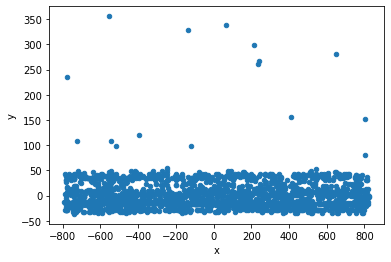

In [13]:
coords_df = pd.DataFrame(coords, columns=['x', 'y'])
coords_df.plot.scatter('x', 'y')

Again we need to tweak the clusters and try to find out what works best while generating classification labels using unsupervised learning.